Importing all the packages

In [11]:
import torch, os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Importing datasets

Downloading/Loading MNIST dataset...
Dataset loaded.
Number of training images: 60000
Number of test images: 10000
Created DataLoaders with batch size 256.

Displaying the first 5 training images (after denormalization)...


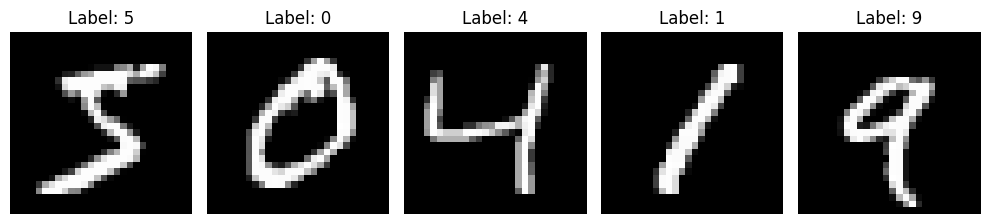


Iterating through one batch from train_loader:
Batch of images shape: torch.Size([256, 1, 28, 28])
Batch of labels shape: torch.Size([256])


In [ ]:
# 1. Define Transformations for the Dataset
#    - ToTensor(): Converts images to PyTorch tensors (C x H x W) in range [0.0, 1.0]
#    - Normalize((0.5,), (0.5,)): Normalizes tensor image with mean 0.5 and std 0.5.
#      This shifts the range from [0.0, 1.0] to [-1.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Mean and std for the single grayscale channel
])

# 2. Load the MNIST Dataset
print("Downloading/Loading MNIST dataset...")
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
print("Dataset loaded.")
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of test images: {len(test_dataset)}")

# 3. Create DataLoaders for Batching
#    - DataLoader provides an iterator over the dataset in batches.
#    - shuffle=True is important for training to ensure batches are different each epoch.
batch_size = 2048 # You can change this
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle test data
print(f"Created DataLoaders with batch size {batch_size}.")

# 4. Function to View Images (Denormalizing)
def imshow_denormalize(img_tensor, title):
    # Reverse the normalization: image = normalized_image * std + mean
    img = img_tensor * 0.5 + 0.5
    # Clamp values to [0, 1] just in case of potential floating point inaccuracies
    img = torch.clamp(img, 0, 1)
    # Remove channel dimension and convert to numpy for plotting
    npimg = img.squeeze().numpy()
    plt.imshow(npimg, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Display the first 5 images from the training dataset
num_images_to_show = 5
print(f"\nDisplaying the first {num_images_to_show} training images (after denormalization)...")
plt.figure(figsize=(10, 3))

for i in range(num_images_to_show):
    # Get image and label directly from the dataset (before batching)
    image, label = train_dataset[i]
    plt.subplot(1, num_images_to_show, i + 1)
    imshow_denormalize(image, f'Label: {label}')

plt.tight_layout()
plt.show()


# 5. Example: Iterate through one batch of the training data via DataLoader
print("\nIterating through one batch from train_loader:")
# Get one batch
try:
    images, labels = next(iter(train_loader))
    # Print the shapes of the batch
    print(f"Batch of images shape: {images.shape}") # e.g., [64, 1, 28, 28] (Batch Size, Channels, Height, Width)
    print(f"Batch of labels shape: {labels.shape}")   # e.g., [64]
except StopIteration:
    print("Could not get a batch from train_loader (maybe dataset is empty?)")


========== Processing Dataset: MNIST ==========
PyTorch Version: 2.6.0+cu124
Torchvision Version: 0.21.0+cu124
Data will be stored in: ./data/mnist_mnist
Downloading/Loading MNIST dataset...
MNIST dataset loaded.
Number of training images: 60000
Number of test images: 10000
Created MNIST DataLoaders with batch size 1024.

Displaying the first 5 MNIST training images...


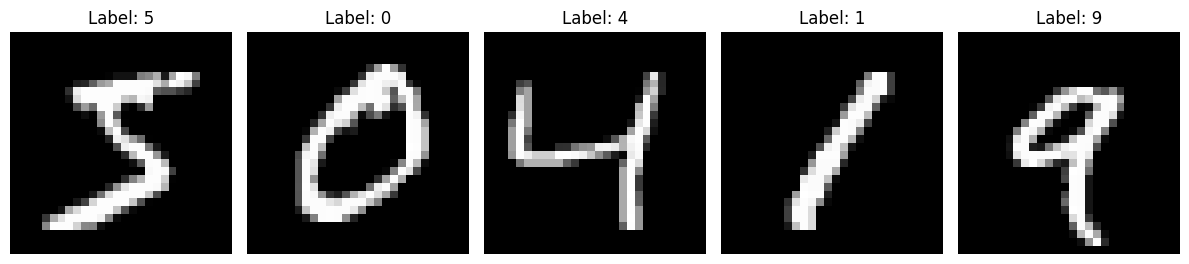


Iterating through one batch from MNIST train_loader:
Batch of images shape: torch.Size([1024, 1, 28, 28])
Batch of labels shape: torch.Size([1024])

========== Finished Processing: MNIST ==========

========== Processing Dataset: CIFAR-10 ==========
PyTorch Version: 2.6.0+cu124
Torchvision Version: 0.21.0+cu124
Data will be stored in: ./data/cifar-10_cifar10
Downloading/Loading CIFAR-10 dataset...
CIFAR-10 dataset loaded.
Number of training images: 50000
Number of test images: 10000
Created CIFAR-10 DataLoaders with batch size 1024.

Displaying the first 5 CIFAR-10 training images...


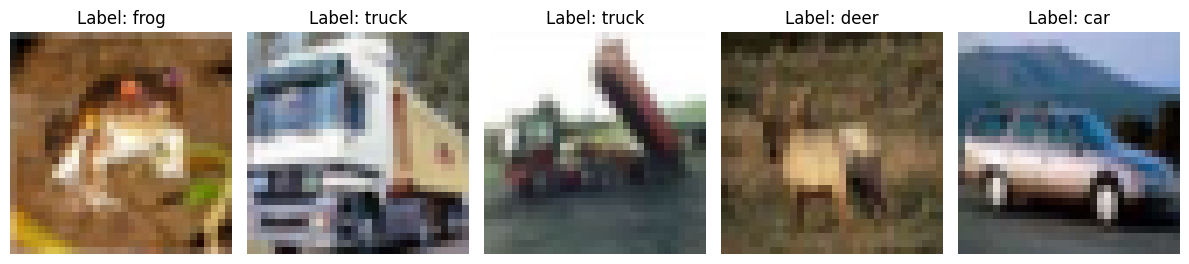


Iterating through one batch from CIFAR-10 train_loader:
Batch of images shape: torch.Size([1024, 3, 32, 32])
Batch of labels shape: torch.Size([1024])

========== Finished Processing: CIFAR-10 ==========

========== Processing Dataset: PCAM ==========
PyTorch Version: 2.6.0+cu124
Torchvision Version: 0.21.0+cu124
Data will be stored in: ./data/pcam_pcam
Downloading/Loading PCAM dataset...
PCAM dataset loaded.
Number of training images: 262144
Number of test images: 32768
Created PCAM DataLoaders with batch size 1024.

Displaying the first 4 PCAM training images...


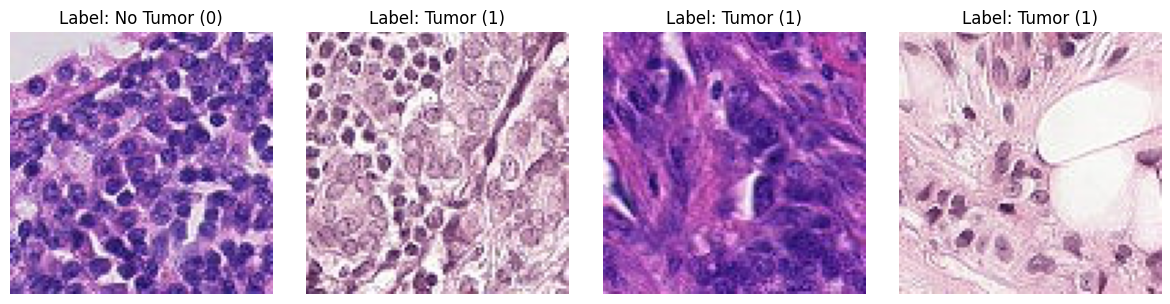


Iterating through one batch from PCAM train_loader:
Batch of images shape: torch.Size([1024, 3, 96, 96])
Batch of labels shape: torch.Size([1024])

========== Finished Processing: PCAM ==========


In [15]:
# Helper function for visualization (handles denormalization and color/grayscale)
def imshow_denormalize(img_tensor, title, mean, std, is_color=True):
    """Shows a denormalized image tensor."""
    # Ensure mean and std are tensors and have the correct shape for broadcasting
    mean = torch.tensor(mean).view(-1, 1, 1) # Shape: [C, 1, 1]
    std = torch.tensor(std).view(-1, 1, 1)   # Shape: [C, 1, 1]

    # Denormalize: image = normalized_image * std + mean
    img = img_tensor * std + mean
    # Clamp values to [0, 1] after denormalization
    img = torch.clamp(img, 0, 1)

    # Prepare for matplotlib
    if is_color:
        # Transpose from (C x H x W) to (H x W x C) for color images
        npimg = img.permute(1, 2, 0).numpy()
        cmap = None
    else:
        # Remove channel dimension for grayscale images
        npimg = img.squeeze().numpy()
        cmap = 'gray'

    plt.imshow(npimg, cmap=cmap)
    plt.title(title)
    plt.axis('off')


def process_dataset(dataset_name, batch_size=1024, num_images_to_show=5, data_root_base='./data'):
    """
    Loads, transforms, creates DataLoaders, and visualizes a specified dataset.

    Args:
        dataset_name (str): Name of the dataset ('MNIST', 'CIFAR-10', 'PCAM').
        batch_size (int): Batch size for DataLoaders.
        num_images_to_show (int): Number of images to display.
        data_root_base (str): Base directory to store dataset folders.

    Returns:
        tuple: (train_loader, test_loader) for the specified dataset, or (None, None) on failure.
    """
    print(f"\n{'='*10} Processing Dataset: {dataset_name} {'='*10}")
    print(f"PyTorch Version: {torch.__version__}")
    print(f"Torchvision Version: {torchvision.__version__}")

    dataset_name_lower = dataset_name.lower()
    mean, std, dataset_class, data_root_suffix, classes, is_color = None, None, None, None, None, None

    # --- Dataset Specific Configurations ---
    if dataset_name_lower == 'mnist':
        mean = (0.5,) # Single channel mean
        std = (0.5,)  # Single channel std
        dataset_class = datasets.MNIST
        data_root_suffix = '_mnist'
        classes = [str(i) for i in range(10)] # Labels 0-9
        is_color = False
    elif dataset_name_lower == 'cifar-10':
        mean = [0.4914, 0.4822, 0.4465] # 3 channels mean
        std = [0.2023, 0.1994, 0.2010]  # 3 channels std
        dataset_class = datasets.CIFAR10
        data_root_suffix = '_cifar10'
        classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        is_color = True
    elif dataset_name_lower == 'pcam':
        # Check prerequisites for PCAM
        try:
            import h5py
        except ImportError:
            print("Error: h5py package not found. PCAM requires it. Please install: pip install h5py")
            return None, None
        if not hasattr(datasets, 'PCAM'):
            print("Error: torchvision.datasets.PCAM not found.")
            print("Please upgrade torchvision (e.g., 0.16+). Try: pip install --upgrade torchvision")
            return None, None

        # PCAM uses ImageNet means/stds often as default
        mean = [0.485, 0.456, 0.406] # 3 channels mean
        std = [0.229, 0.224, 0.225]  # 3 channels std
        dataset_class = datasets.PCAM
        data_root_suffix = '_pcam'
        classes = {0: 'No Tumor', 1: 'Tumor'} # Dictionary mapping for binary labels
        is_color = True
    else:
        print(f"Error: Dataset '{dataset_name}' not recognized. Choose from 'MNIST', 'CIFAR-10', 'PCAM'.")
        return None, None

    # --- Common Steps ---
    data_root = os.path.join(data_root_base, dataset_name.lower() + data_root_suffix)
    print(f"Data will be stored in: {data_root}")

    # 1. Define Transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

    # 2. Load Dataset
    print(f"Downloading/Loading {dataset_name} dataset...")
    try:
        if dataset_name_lower == 'pcam':
             # PCAM takes 'split' argument instead of 'train'
             # Download might require 'gdown': pip install gdown
             train_dataset = dataset_class(root=data_root, split='train', download=True, transform=transform)
             test_dataset = dataset_class(root=data_root, split='test', download=True, transform=transform)
        else:
             train_dataset = dataset_class(root=data_root, train=True, download=True, transform=transform)
             test_dataset = dataset_class(root=data_root, train=False, download=True, transform=transform)

        print(f"{dataset_name} dataset loaded.")
        print(f"Number of training images: {len(train_dataset)}")
        print(f"Number of test images: {len(test_dataset)}")
    except ImportError as e: # Catch specific import errors if needed (e.g., for gdown)
         print(f"Import Error loading {dataset_name}: {e}. Check prerequisites (h5py, gdown?).")
         return None, None
    except RuntimeError as e:
         print(f"Runtime Error loading {dataset_name}: {e}. Check prerequisites, permissions, or disk space.")
         return None, None
    except Exception as e:
        print(f"An unexpected error occurred loading {dataset_name}: {e}")
        return None, None

    # 3. Create DataLoaders
    # Use num_workers > 0 if your system supports it well, especially for larger datasets like PCAM
    num_workers = 2 if dataset_name_lower == 'pcam' else 0
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    print(f"Created {dataset_name} DataLoaders with batch size {batch_size}.")

    # 4. Visualize Samples
    print(f"\nDisplaying the first {num_images_to_show} {dataset_name} training images...")
    plt.figure(figsize=(12, 3))
    for i in range(num_images_to_show):
        try:
            image, label = train_dataset[i] # Get label (int or tensor)
            # Get class name/string based on dataset's label format
            if isinstance(classes, dict):
                label_str = f"{classes[label]} ({label})" # For PCAM dict {0: 'No Tumor', 1: 'Tumor'}
            elif isinstance(label, torch.Tensor):
                 label_str = classes[label.item()] # Handle tensor labels if any dataset returns them
            else:
                 label_str = classes[label] # For MNIST/CIFAR-10 tuple/list

            plt.subplot(1, num_images_to_show, i + 1)
            # Pass dataset-specific mean, std, and color flag to helper
            imshow_denormalize(image, f'Label: {label_str}', mean, std, is_color=is_color)
        except IndexError:
             print(f"Warning: Could only retrieve {i} images for display.")
             break
        except Exception as e:
             print(f"Error displaying image {i}: {e}")

    plt.tight_layout()
    plt.show()

    # 5. Example: Iterate through one batch
    print(f"\nIterating through one batch from {dataset_name} train_loader:")
    try:
        images, labels = next(iter(train_loader))
        print(f"Batch of images shape: {images.shape}")
        print(f"Batch of labels shape: {labels.shape}")
    except StopIteration:
        print(f"Could not get a batch from {dataset_name} train_loader.")
    except RuntimeError as e:
        # HDF5 + multiprocessing can sometimes cause issues
        print(f"Runtime error iterating {dataset_name} loader: {e}")
        if dataset_name_lower == 'pcam':
            print("Hint: If using num_workers > 0 with PCAM (HDF5), issues can sometimes arise.")
            print("      Try setting num_workers=0 in the DataLoader if problems persist.")

    print(f"\n{'='*10} Finished Processing: {dataset_name} {'='*10}")
    return train_loader, test_loader

# --- Example Usage ---
if __name__ == "__main__":
    # Process MNIST
    train_loader_mnist, test_loader_mnist = process_dataset('MNIST', batch_size=1024)

    # Process CIFAR-10
    train_loader_cifar10, test_loader_cifar10 = process_dataset('CIFAR-10', batch_size=1024)

    # Process PCAM (PatchCamelyon) - Needs h5py, gdown, and enough disk space
    # Note: First run might take a very long time to download (~8GB)
    train_loader_pcam, test_loader_pcam = process_dataset('PCAM', batch_size=1024, num_images_to_show=4)

    # You can now use the returned loaders, e.g., for training:
    # if train_loader_mnist:
    #    print("\nMNIST Train loader is ready for use.")